## Predicting Bike Rentals
----------------------------------------------------------------


In [1]:
import numpy as np ; import pandas as pd ; import matplotlib.pyplot as plt ; import seaborn as sns
from sklearn.linear_model import LinearRegression ; from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split ; from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

### 1. Introduction to the Dataset

In [2]:
df = pd.read_csv('hour.csv')

# Check if the dataframe contains any null values
print(df.isnull().sum().sum()) # There is no nulls

#Print first few rows of the dataframe  
df.head()

0


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


array([[<AxesSubplot:title={'center':'cnt'}>]], dtype=object)

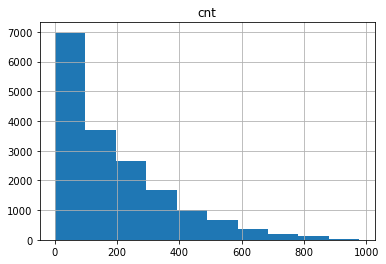

In [3]:
df.hist(column = 'cnt')

Text(0.5, 1.0, 'Features Correlating with Count of total rental bikes')

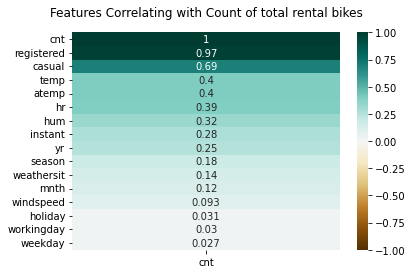

In [4]:
corr_cnt = df.corr()[['cnt']].abs()
heatmap = sns.heatmap(corr_cnt.sort_values(by='cnt', ascending=False), 
vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Count of total rental bikes', pad=16)

### 2. Calculating features

In [5]:
def assign_label(hour):
    if hour >=0 and hour < 6:
        return 4
    elif hour >=6 and hour < 12:
        return 1
    elif hour >= 12 and hour < 18:
        return 2
    elif hour >= 18 and hour <=24:
        return 3

df["time_label"] = df["hr"].apply(assign_label)
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,4
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,4
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,4
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,4
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,4


### 3. Splitting the Data Into Train and Test Sets

In [6]:
x = df.loc[:, df.columns.difference(['cnt', 'casual', 'registered', 'dteday'])] ; y = df['cnt']
# Split into train and test   
x_train, x_test,y_train , y_test = train_test_split(x, y, test_size = 0.2, shuffle=True, random_state=1)

I chose to remove some columns casual, registered and dteday because they provide information after the bike is rented and would therefore not help to predicy factors that cause the rent.

In [7]:
lr = LinearRegression()
lr.fit(x_train, y_train)  
predictions = lr.predict(x_test)

In [8]:
mse = mean_squared_error(y_test, predictions)
mse

17538.780638130676

### 5. Applying Decision Trees

In [9]:
#Apply default min samples leaf
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
predictions = dt.predict(x_test)
mse = mean_squared_error(y_test, predictions)
print(mse)

3276.905926352129


In [10]:
# Try to find the best number of minimum leaves samples
dt_mse = [] ; leaves = np.arange(1,10) 
for leaf in leaves :
    dt = DecisionTreeRegressor(min_samples_leaf=leaf)
    dt.fit(x_train, y_train)
    predictions = dt.predict(x_test)
    mse = mean_squared_error(y_test, predictions)
    dt_mse.append(mse)
    print(f"For {leaf} minimum leaves in the tree the mean squared error of predictions is {np.round(mse,2)}")

print("")
print(f"The minimal mse is reached for {np.argmin(dt_mse)+1} leaves and gives a mse score of {np.round(dt_mse[np.argmin(dt_mse)],2)}")


For 1 minimum leaves in the tree the mean squared error of predictions is 3252.0
For 2 minimum leaves in the tree the mean squared error of predictions is 2879.19
For 3 minimum leaves in the tree the mean squared error of predictions is 2687.16
For 4 minimum leaves in the tree the mean squared error of predictions is 2505.65
For 5 minimum leaves in the tree the mean squared error of predictions is 2483.69
For 6 minimum leaves in the tree the mean squared error of predictions is 2360.71
For 7 minimum leaves in the tree the mean squared error of predictions is 2471.9
For 8 minimum leaves in the tree the mean squared error of predictions is 2619.05
For 9 minimum leaves in the tree the mean squared error of predictions is 2612.52

The minimal mse is reached for 6 leaves and gives a mse score of 2360.71


### 6. Random Forrest

In [11]:
rf = RandomForestRegressor(min_samples_leaf=5)
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)
mse = mean_squared_error(y_test, predictions)
mse

1762.7058828562958